In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

import sys
import os

In [2]:
def read_data(dataset_folder: str,
              name_sub_folder: str) -> pd.DataFrame:
    """
    Reads all csv files in a specified subfolder within a dataset folder and concatenates them into a single pandas dataframe.
    
    Args:
     dataset_folder (str): path to the dataset folder.
     name_sub_folder (str): name of the subfolder containing the csv files to be read.
    
    Returns:
     pd.DataFrame containing all the csv files from the specified subfolder concatenated together.
    """
    full_data = []
    for f in os.listdir(os.path.join(dataset_folder, name_sub_folder)):
        data = pd.read_csv(os.path.join(dataset_folder, name_sub_folder, f))
        full_data.append(data)
    return pd.concat(full_data) 

In [3]:
train_full = read_data('./random_split/', 'train')
val_full = read_data('./random_split/', 'dev')
test_full = read_data('./random_split/', 'test')

In [4]:
train_full.shape, val_full.shape, test_full.shape

((1086741, 5), (126171, 5), (126171, 5))

In [5]:
# Proportion of the train, validation, and test sets
tot_samples = len(train_full) + len(val_full) + len(test_full) 
print('The proportion of train set: %f' % (len(train_full) / tot_samples))
print('The proportion of valid set: %f' % (len(val_full) / tot_samples))
print('The proportion of test set: %f' % (len(test_full) / tot_samples))

The proportion of train set: 0.811556
The proportion of valid set: 0.094222
The proportion of test set: 0.094222


In [6]:
# Number of Pfams
print('Number of Pfams in train set: %f' % (len(train_full['family_accession'].unique())))
print('Number of Pfams in valid set: %f' % (len(val_full['family_accession'].unique())))
print('Number of Pfams in test set: %f' % (len(test_full['family_accession'].unique())))

Number of Pfams in train set: 17929.000000
Number of Pfams in valid set: 13071.000000
Number of Pfams in test set: 13071.000000


In [7]:
train_full.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence
0,Penicillinase_R,Q81U16_BACAN/8-123,PF03965.16,ISEAELEIMKVLWLKSP.QTANEIIEE.LEDP.MDW..KPKTIRTL...,ISEAELEIMKVLWLKSPQTANEIIEELEDPMDWKPKTIRTLINRLV...
1,Rtt106,POB3_CANAL/362-454,PF08512.12,AGVPCSVKA...SEGYLFPL......DRCFLF.VTKPTLYIPYSE....,AGVPCSVKASEGYLFPLDRCFLFVTKPTLYIPYSEISSVVMSRTGG...
2,F-actin_cap_A,Q8I3I2_PLAF7/12-301,PF01267.17,IRHVLMNSPPGKLYDLVK..DINILL.G.........SSVSIQ.KI...,IRHVLMNSPPGKLYDLVKDINILLGSSVSIQKILEEVLKDYNEKNY...
3,HupF_HypC,O28902_ARCFU/1-65,PF01455.18,MCIAIPGR...I.ER..IDY...............P....IAIVDF...,MCIAIPGRIERIDYPIAIVDFKGLKKEVRIDLLENPQIGDYVLVHV...
4,DUF3794,R6BY75_9CLOT/189-271,PF12673.7,NIFHI..LWEDVDL..E.GVTFKPMG...E...........S.......,NIFHILWEDVDLEGVTFKPMGESISVQGDIHIFVLYEGEGENTPIR...


# Check for duplicate sequences
### They can confound the model because they profide an extra bias - some sequences will be oversamples

In [8]:
duplicated_seqs_and_fam_accession = train_full.loc[train_full[['sequence', 'family_accession']].duplicated()]

### See if there is a difference between duplicated sequences only and sequences and family accessions

In [9]:
duplicated_seqs = train_full.loc[train_full[['sequence']].duplicated()]

In [10]:
duplicated_seqs_and_fam_accession.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence
10184,gag_pre-integrs,A5AJM6_VITVI/418-475,PF13976.6,GLYHL..TS.......................D...........S....,GLYHLTSDSSPAVCISTDAPLLIHNRLGHPSLSKFQKMVPRFSTLS...
7545,gag_pre-integrs,A5BGX3_VITVI/392-455,PF13976.6,TLYMT..SC.....................P.R...........D....,TLYMTSCPRDTIAVADASTDTSLWHRRLGHMSEKGMKMLLSKGKLP...
9036,gag_pre-integrs,Q6AUC7_ORYSJ/316-385,PF13976.6,NLYHL..RG..........T....T.I...L.G...........N....,NLYHLRGTTILGNVAAVSDSLSNSDATNLWHMRLGHMSEIGLAELS...
8760,PIN_6,F6UJS5_CALJA/7-93,PF17146.4,VVADAGAFL.RD......AALQDIGKNIYTIREVVT.EIRDKATRR...,VVADAGAFLRDAALQDIGKNIYTIREVVTEIRDKATRRRLAVLPYE...
3612,Importin_rep_2,A0A093C485_9AVES/556-599,PF18786.1,TSQCMWLMQALGFLLSALQVEEILKNLHSLITPYIQQLEKLADE,TSQCMWLMQALGFLLSALQVEEILKNLHSLITPYIQQLEKLADE


In [11]:
duplicated_seqs.head()

,family_id,sequence_name,family_accession,aligned_sequence,sequence
10184,gag_pre-integrs,A5AJM6_VITVI/418-475,PF13976.6,GLYHL..TS.......................D...........S....,GLYHLTSDSSPAVCISTDAPLLIHNRLGHPSLSKFQKMVPRFSTLS...
7545,gag_pre-integrs,A5BGX3_VITVI/392-455,PF13976.6,TLYMT..SC.....................P.R...........D....,TLYMTSCPRDTIAVADASTDTSLWHRRLGHMSEKGMKMLLSKGKLP...
9036,gag_pre-integrs,Q6AUC7_ORYSJ/316-385,PF13976.6,NLYHL..RG..........T....T.I...L.G...........N....,NLYHLRGTTILGNVAAVSDSLSNSDATNLWHMRLGHMSEIGLAELS...
8760,PIN_6,F6UJS5_CALJA/7-93,PF17146.4,VVADAGAFL.RD......AALQDIGKNIYTIREVVT.EIRDKATRR...,VVADAGAFLRDAALQDIGKNIYTIREVVTEIRDKATRRRLAVLPYE...
3612,Importin_rep_2,A0A093C485_9AVES/556-599,PF18786.1,TSQCMWLMQALGFLLSALQVEEILKNLHSLITPYIQQLEKLADE,TSQCMWLMQALGFLLSALQVEEILKNLHSLITPYIQQLEKLADE


### i.e. there are sequences that are in mulptiple families

## Let's see which ones they are

In [12]:
df_sequences_with_different_family_accessions = pd.merge(duplicated_seqs_and_fam_accession,duplicated_seqs, indicator=True, how='outer')\
        .query('_merge=="right_only"')\
        .drop('_merge', axis=1)

In [13]:
df_sequences_with_different_family_accessions

,family_id,sequence_name,family_accession,aligned_sequence,sequence
424,NAD2,E9QMH1_MOUSE/234-407,PF18782.1,DPLSEEEFYSQFYNQRVKHLCYYHRMKPYLCYQL.EQFN..GQAP....,DPLSEEEFYSQFYNQRVKHLCYYHRMKPYLCYQLEQFNGQAPLKGC...
425,NPL,NLP_DROME/6-104,PF17800.1,FYGVTLTAES...DS..VT....WD......VD..EDYAR..GQKL...,FYGVTLTAESDSVTWDVDEDYARGQKLVIKQILLGAEAKENEFNVV...


## So, let's also see what the duplicate sequences are

In [14]:
train_full.loc[train_full['sequence'].isin(df_sequences_with_different_family_accessions['sequence'].values)]

,family_id,sequence_name,family_accession,aligned_sequence,sequence
2981,NAD1,ABEC3_MOUSE/245-418,PF18778.1,DPLSEEEFYSQFYNQRVKHLCYY.HRMKPYL.CYQLE..QF........,DPLSEEEFYSQFYNQRVKHLCYYHRMKPYLCYQLEQFNGQAPLKGC...
7400,NAD2,E9QMH1_MOUSE/234-407,PF18782.1,DPLSEEEFYSQFYNQRVKHLCYYHRMKPYLCYQL.EQFN..GQAP....,DPLSEEEFYSQFYNQRVKHLCYYHRMKPYLCYQLEQFNGQAPLKGC...
5367,Nucleoplasmin,B4HZJ8_DROSE/6-104,PF03066.15,FY.GVTLTAESDSVTWDVD............EDYARGQKLVIKQIL...,FYGVTLTAESDSVTWDVDEDYARGQKLVIKQILLGAEAKENEFNVV...
2690,NPL,NLP_DROME/6-104,PF17800.1,FYGVTLTAES...DS..VT....WD......VD..EDYAR..GQKL...,FYGVTLTAESDSVTWDVDEDYARGQKLVIKQILLGAEAKENEFNVV...


it looks like the sequences belong to similar families, so this is likely not a mistake

### We will leave those in the dataset, but we will drop the duplicates where the family accession and sequence are the same

In [15]:
len(val_full.loc[val_full[['sequence', 'family_accession']].duplicated()]), len(val_full.loc[val_full[['sequence']].duplicated()])

(21, 21)

In [16]:
len(test_full.loc[test_full[['sequence', 'family_accession']].duplicated()]), len(test_full.loc[test_full[['sequence']].duplicated()])

(10, 10)

i.e. in the test and dev sets there are no such occurences, but only a few duplicates

In [17]:
def drop_duplicated_fam_access_and_seq(df: pd.DataFrame) -> pd.DataFrame:
    """Remove duplicated entries from a DataFrame based on sequence and family accession, 
    keeping only the first occurrence of each. Reset the index of the DataFrame after 
    removing the duplicates.

    Parameters:
     df (pd.DataFrame): Input DataFrame with 'sequence' and 'family_accession' columns.

    Returns:
     df (pd.DataFrame): DataFrame with duplicates removed based on 'sequence' and 'family_accession',
    with index reset.
    """
    return df.drop_duplicates(['sequence', 'family_accession'], keep='first').reset_index(drop=True)

In [18]:
train_no_dups = drop_duplicated_fam_access_and_seq(train_full)
val_no_dups = drop_duplicated_fam_access_and_seq(val_full)
test_no_dups = drop_duplicated_fam_access_and_seq(test_full)

del train_full, val_full, test_full

In [19]:
def get_df_with_length_column(df: pd.DataFrame) -> pd.DataFrame:
    """Add a new column to the input DataFrame containing the length of each sequence.

    Parameters:
     df (pd.DataFrame): Input DataFrame with a 'sequence' column.

    Returns:
     df (pd.DataFrame): df with a new column called 'seq_length', containing the 
    length of each sequence.
    """
    df['seq_length'] = df['sequence'].apply(len)
    return df

In [20]:
train_no_dups = get_df_with_length_column(train_no_dups)
val_no_dups = get_df_with_length_column(val_no_dups)
test_no_dups = get_df_with_length_column(test_no_dups)

## The cleanup didn't change the overall distribution of 81.2% of the data in the training set, 9.4% of the data in the validation/dev set and 9.4% of the data in the test set

In [21]:
train_no_dups.shape, val_no_dups.shape, test_no_dups.shape

((1086317, 6), (126150, 6), (126161, 6))

In [22]:
# Check the proportion of the train, validation, and test sets
tot_samples = len(train_no_dups) + len(val_no_dups) + len(test_no_dups) 
print('The proportion of train set: %f' % (len(train_no_dups) / tot_samples))
print('The proportion of valid set: %f' % (len(val_no_dups) / tot_samples))
print('The proportion of test set: %f' % (len(test_no_dups) / tot_samples))

The proportion of train set: 0.811515
The proportion of valid set: 0.094238
The proportion of test set: 0.094246


In [23]:
# Number of Pfams
print('Number of Pfams in train set: %d' % (len(train_no_dups['family_accession'].unique())))
print('Number of Pfams in valid set: %d' % (len(val_no_dups['family_accession'].unique())))
print('Number of Pfams in test set: %d' % (len(test_no_dups['family_accession'].unique())))

Number of Pfams in train set: 17929
Number of Pfams in valid set: 13071
Number of Pfams in test set: 13071


## Check if all families on the training set are within the test and val sets

In [24]:
val_no_dups.loc[~val_no_dups['family_accession'].isin(set(train_no_dups['family_accession'].values))]

,family_id,sequence_name,family_accession,aligned_sequence,sequence,seq_length


In [25]:
test_no_dups.loc[~test_no_dups['family_accession'].isin(set(train_no_dups['family_accession'].values))]

,family_id,sequence_name,family_accession,aligned_sequence,sequence,seq_length


Hence, all the families in the test and dev sets have examples in the training set, as expected.

# Plot correlation between family size (number of sequences in the family) and average length of a sequence in a family

In [26]:
# guaranteed that the order of the families in the two groupbys will be the same
avg_lengths_of_seqs = train_no_dups.groupby('family_accession', sort=True)['seq_length'].mean()
family_sizes = train_no_dups.groupby('family_accession', sort=True)['seq_length'].count()

Text(0.5, 1.0, 'Correlation Between Sequence Length and Family Size')

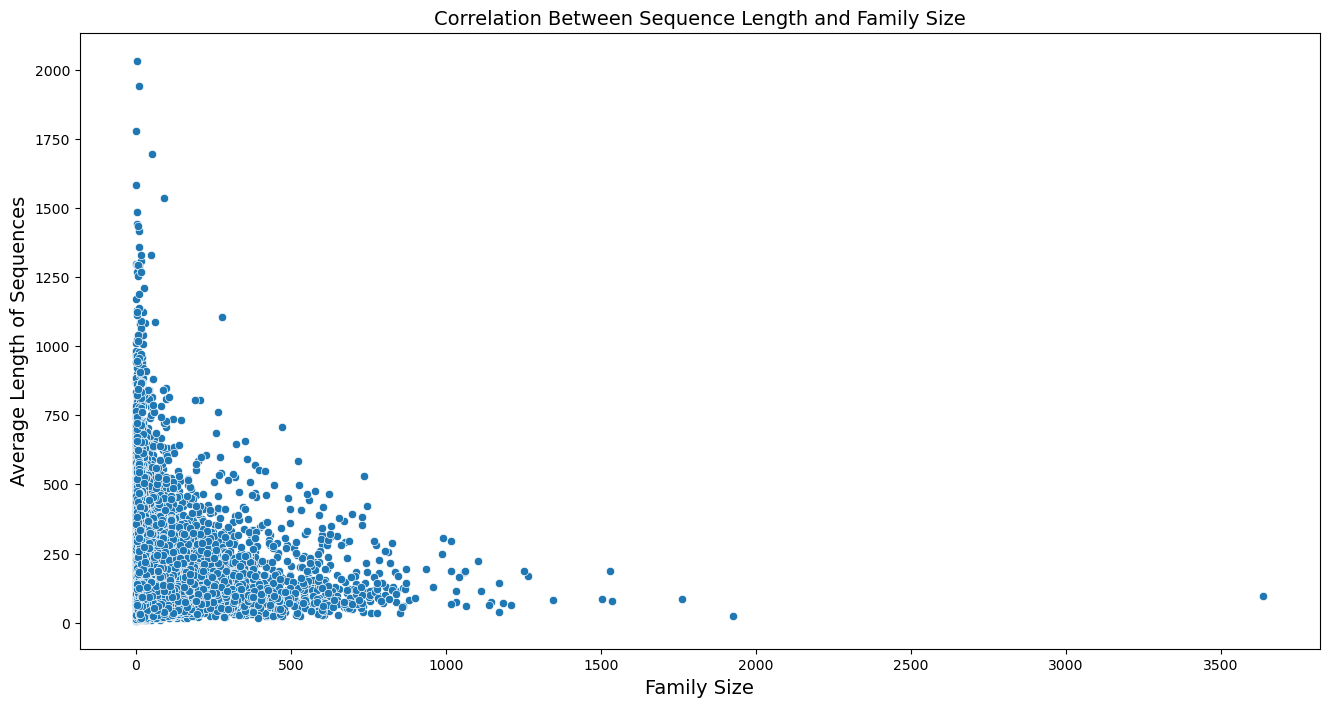

In [27]:
fig, ax = plt.subplots(figsize = (16,8))
sn.scatterplot(y=avg_lengths_of_seqs, x=family_sizes)
plt.xlabel('Family Size', fontdict={'fontsize':14})
plt.ylabel('Average Length of Sequences', fontdict={'fontsize':14})
plt.title('Correlation Between Sequence Length and Family Size', fontdict={'fontsize':14})

### From the above plot, we can see that very long (say above 750 amino acids) sequences usually belong to very small families (say up to 100 members), and very large families (say above 500) usually have short sequences (say below 250) 

## It looks like the data comes from the same distribution in terms of sequence lengths
This makes sense because it is supposed to be a random split of the proteins in each family

In [28]:
# will plot also the 90th percentile and median values for the training set
seq_lens_90th_percentile = np.percentile(train_no_dups['seq_length'].values, 90)
seq_lens_median = np.median(train_no_dups['seq_length'].values)

Text(0.5, 1.0, 'Histogram Plot of the Sequence Length in the Datasets')

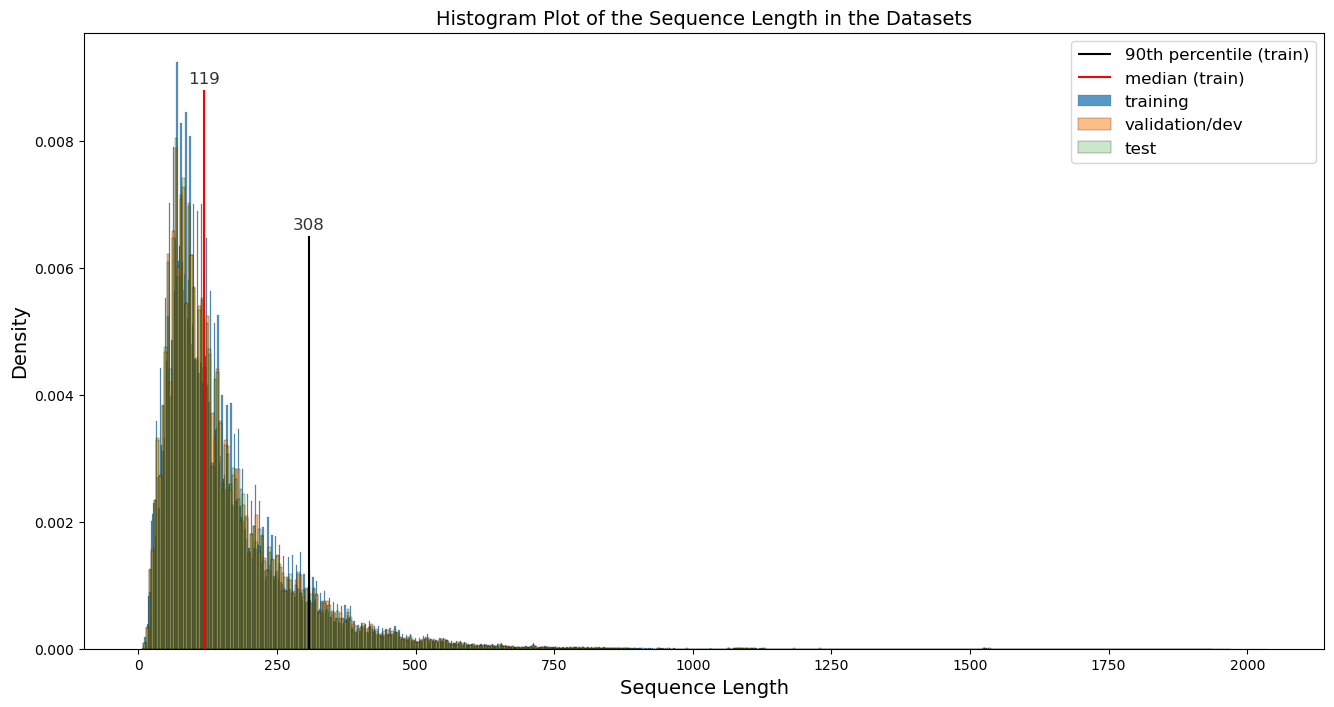

In [29]:
fig, ax = plt.subplots(figsize = (16,8))
sn.histplot(x=train_no_dups['seq_length'], stat='density', label='training')
sn.histplot(x=val_no_dups['seq_length'], stat='density', alpha=0.5, label='validation/dev')
sn.histplot(x=test_no_dups['seq_length'], stat='density', alpha=0.25, label='test')
plt.vlines(x=seq_lens_90th_percentile, ymin=0, ymax=0.0065, color='black', label='90th percentile (train)')
plt.vlines(x=seq_lens_median, ymin=0, ymax=0.0088, color='red', label='median (train)')
ax.text(seq_lens_90th_percentile-30, 0.0066, f"{int(seq_lens_90th_percentile)}", size = 12, alpha = 0.8)
ax.text(seq_lens_median-30, 0.0089, f"{int(seq_lens_median)}", size = 12, alpha = 0.8)
plt.legend(fontsize=12)
plt.xlabel('Sequence Length', fontdict={'fontsize':14})
plt.ylabel('Density', fontdict={'fontsize':14})
plt.title('Histogram Plot of the Sequence Length in the Datasets', fontdict={'fontsize':14})

## Look at a log-scale plot for clarity

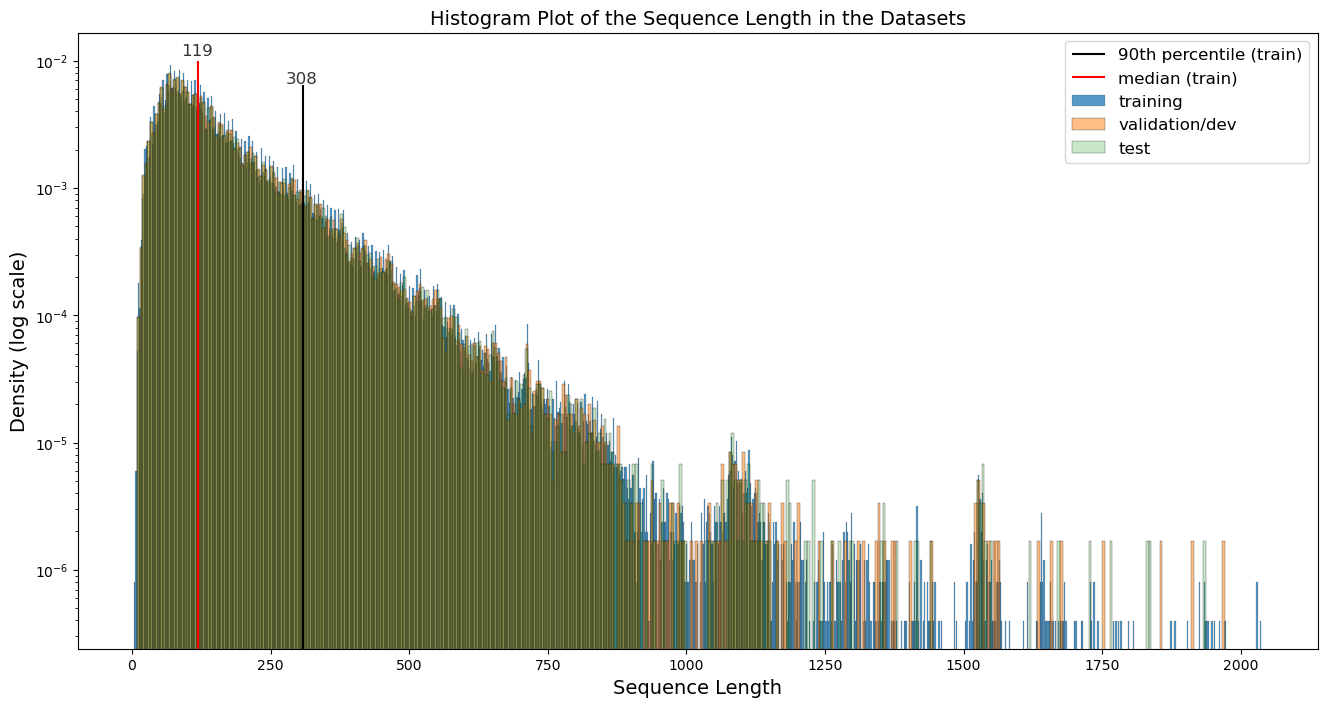

In [30]:
fig, ax = plt.subplots(figsize = (16,8))
sn.histplot(x=train_no_dups['seq_length'], stat='density', label='training')
sn.histplot(x=val_no_dups['seq_length'], stat='density', alpha=0.5, label='validation/dev')
sn.histplot(x=test_no_dups['seq_length'], stat='density', alpha=0.25, label='test')
plt.vlines(x=seq_lens_90th_percentile, ymin=0, ymax=0.0065, color='black', label='90th percentile (train)')
plt.vlines(x=seq_lens_median, ymin=0, ymax=0.01, color='red', label='median (train)')
ax.text(seq_lens_90th_percentile-30, 0.0066, f"{int(seq_lens_90th_percentile)}", size = 12, alpha = 0.8)
ax.text(seq_lens_median-30, 0.011, f"{int(seq_lens_median)}", size = 12, alpha = 0.8)
plt.legend(fontsize=12)
plt.xlabel('Sequence Length', fontdict={'fontsize':14})
plt.ylabel('Density (log scale)', fontdict={'fontsize':14})
plt.title('Histogram Plot of the Sequence Length in the Datasets', fontdict={'fontsize':14})
plt.yscale('log')

In [31]:
def get_size_of_family(df: pd.DataFrame) -> dict:
    """
    Returns a dictionary with the count of each unique family_accession in the given DataFrame.

    Parameters:
     df (pd.DataFrame): contains the 'family_accession' and 'family_id' columns.

    Returns:
     dict: count of each unique family_accession.
    """
    return dict(df.groupby('family_accession').count()['family_id'])

In [32]:
family_accession_to_number_of_seqs_train_dict = get_size_of_family(train_no_dups)
family_accession_to_number_of_seqs_val_dict = get_size_of_family(val_no_dups)
family_accession_to_number_of_seqs_test_dict = get_size_of_family(test_no_dups)

In [33]:
family_accession_to_number_of_seqs_overall = get_size_of_family(pd.concat([train_no_dups, val_no_dups, test_no_dups]))

## See what the distribution of family sizes is in the training dataset 
### a similar distribution, but with different number of sequences for each family will be present for the test and dev sets since the splitting was random

In [34]:
num_seqs_90th_percentile = np.percentile(list(family_accession_to_number_of_seqs_train_dict.values()), 90)
num_seqs_median = np.median(list(family_accession_to_number_of_seqs_train_dict.values()))

Text(0.5, 1.0, 'Family Size (Number of Families with K sequences) in the Training Set')

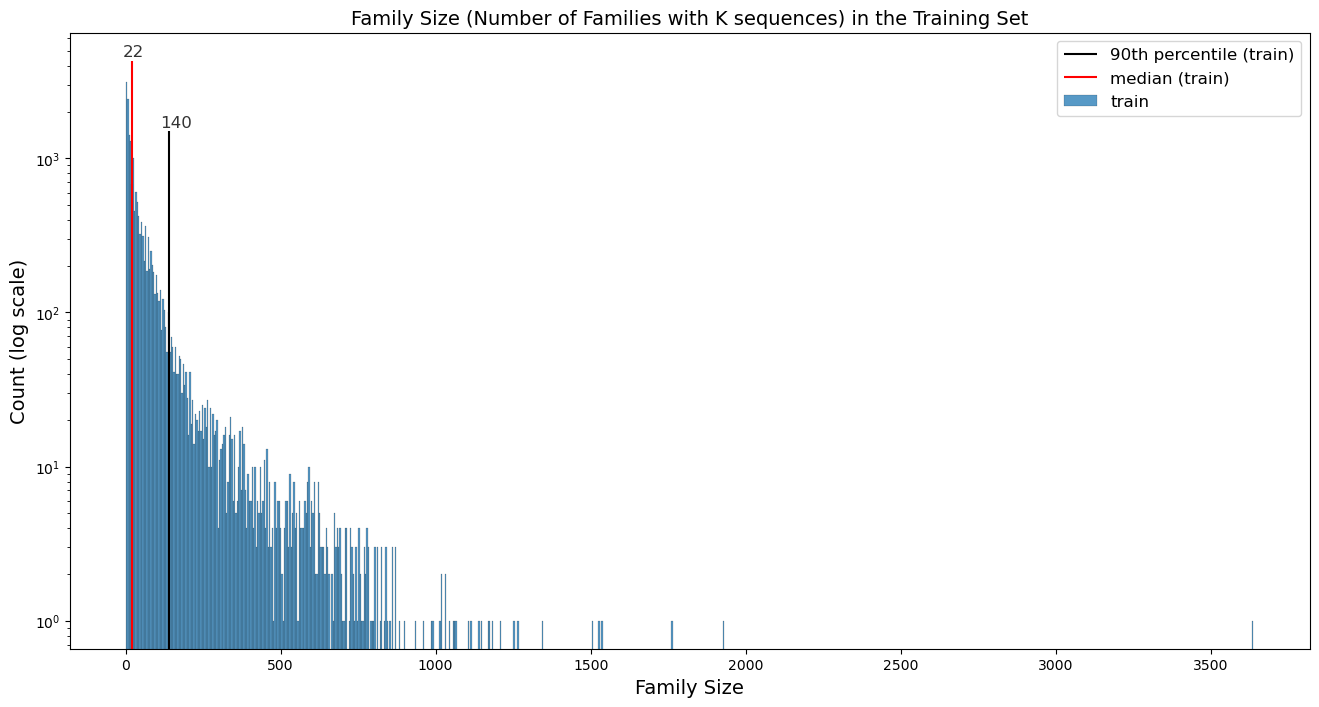

In [35]:
fig, ax = plt.subplots(figsize = (16,8))
sn.histplot(x=family_accession_to_number_of_seqs_train_dict.values(), stat='count', label='train')
plt.vlines(x=num_seqs_90th_percentile, ymin=0, ymax=1500, color='black', label='90th percentile (train)')
plt.vlines(x=num_seqs_median, ymin=0, ymax=4300, color='red', label='median (train)')
ax.text(num_seqs_90th_percentile-30, 1600, f"{int(num_seqs_90th_percentile)}", size = 12, alpha = 0.8)
ax.text(num_seqs_median-30, 4560, f"{int(num_seqs_median)}", size = 12, alpha = 0.8)
plt.legend(fontsize=12)
plt.xlabel('Family Size', fontdict={'fontsize':14})
plt.ylabel('Count (log scale)', fontdict={'fontsize':14})
plt.yscale('log')
plt.title('Family Size (Number of Families with K sequences) in the Training Set', fontdict={'fontsize':14})

# Such a heavy-tailed is typically a hard classification problem
### Heavy-tailed both in terms of sequence lengths and family size

# There are various biases and limitations to consider:

The Pfam seed dataset displays a significant bias towards well-studied families, which can pose challenges when assigning families to unlabeled domains. The train, validation, and test sets being randomly split, there will be equal proportions of family members, making it challenging to train a model that performs well on underrepresented families. While the current setup may yield satisfactory results during model training and evaluation, it is not ideal for real-world applications. To address this, we need to consider balancing procedures such as undersampling the overrepresented classes, oversampling the underrepresented classes (with the risk of overfitting), or assigning a higher weight to the underrepresented classes in the loss function. These methods can help to ensure that the model is trained on a more balanced dataset, leading to improved performance in real-world scenarios where family prevalence is not biased.

### In my case I will follow Bileschi et al.'s procedure (10.1038/s41587-021-01179-w), and I will not be including the debiasing strategies. In general, doing something like Seo et al. (10.1093/bioinformatics/bty275) where they evaluated on GPCRs and COGs.

The second bias is towards shorter sequences. Shorter sequences are overrepresented, and might mean that the confidence in prediction of shorter sequences may be better than that for longer sequences. On the other hand, the fact that many of the families actually contain short sequences, might mean that it would be more difficult to assign an unknown short sequence because it may bear similarity to multiple families.

Finally, multiple sequence alignmnet has limitations in terms of accuracy and reliability, especially for distantly related sequences. This is because the alignment of such sequences can be more challenging due to the presence of insertions, deletions, and substitutions that can lead to inaccuracies in the alignment. As a result, the resulting alignments may not accurately reflect the true evolutionary relationships among the sequences, which can have downstream effects on the accuracy of phylogenetic tree reconstruction, functional site prediction, and structure prediction.

## One limitation specific to me is the limited compute power
I am planning to use a network that is shallower, but reminiscent of the one by Bileschi (10.1038/s41587-021-01179-w) on a Kaggle notebook with a P100 GPU. Hence, it would be a good idea for me to limit the size of the data in a meaningful way such that the data for training is still big, but also substantially decreases the amount of compute time necessary for training.

In order to do that, I will limit the data to have only up to the 90th percentile sequence lengths from the training set (i.e. up to 308, which will reduce the length of our feature vectors, because we will be using padding and all features will be of the same length). After that I will limit the data to only have families with at least the 90th percentile of the number of sequences, which ensures that the families we will consider have a good number of examples to learn from (however, this will substantially decrease the number of possible output classes and number of trainable weights in the model).

In [36]:
def filter_seq_lengths(df: pd.DataFrame, seq_length_cutoff: int) -> pd.DataFrame:
    """
    Filters out sequences from a DataFrame based on a maximum sequence length cutoff.

    Args:
      df (pd.DataFrame): must contain 'seq_length' column.
      seq_length_cutoff (int): The maximum sequence length allowed
                for a sequence to be retained in the filtered DataFrame.

    Returns:
      pd.DataFrame: filtered sequences with length less than or equal to seq_length_cutoff.
    """
    return df.loc[df['seq_length'] <= seq_length_cutoff]

## Apply sequence length cutoff

In [37]:
seq_lens_90th_percentile # this is according to the training set

308.0

In [38]:
train_filtered_seq_lengths = filter_seq_lengths(train_no_dups, seq_lens_90th_percentile)
val_filtered_seq_lengths = filter_seq_lengths(val_no_dups, seq_lens_90th_percentile)
test_filtered_seq_lengths = filter_seq_lengths(test_no_dups, seq_lens_90th_percentile)

The larger part (90%) of the data persists 

In [39]:
len(train_filtered_seq_lengths), len(val_filtered_seq_lengths), len(test_filtered_seq_lengths)

(978359, 113839, 113862)

## Now filter underrepresented families (those with under the 90th percentile of the family size)
First, get a mapping from the family accession to the number of sequences in the family for the DataFrames after the previous cut-off was applied

In [40]:
family_accession_to_number_of_seqs_train_filtered_dict = get_size_of_family(train_filtered_seq_lengths)
family_accession_to_number_of_seqs_val_filtered_dict = get_size_of_family(val_filtered_seq_lengths)
family_accession_to_number_of_seqs_test_filtered_dict = get_size_of_family(test_filtered_seq_lengths)

In [41]:
def filter_underrepresented(df: pd.DataFrame, 
                            family_accession_to_number_of_seqs_dict: dict, 
                            number_of_seqs_cutoff: int) -> pd.DataFrame:
    """
    Filters out rows with family_accession values whose corresponding number of sequences in the dataset 
    is less than the provided cutoff value.

    Args:
      df (pd.DataFrame): containing the data to be filtered
      family_accession_to_number_of_seqs_dict (dict): mapping family accession strings to the number of 
                                               sequences belonging to each family accession in the dataset
      number_of_seqs_cutoff (int): the minimum number of sequences required for a family accession 
                             to be included in the filtered dataset
    
    Returns:
        A filtered pd.DataFrame containing only rows with family_accession values whose corresponding number 
        of sequences is greater than or equal to the provided cutoff value.
    """
    
    # Iterate through the dictionary of family accession to number of sequences and create a list of 
    # family accessions that have a number of sequences greater than or equal to the cutoff value
    family_accessions_above_cutoff = []
    for family_accession, family_size in family_accession_to_number_of_seqs_dict.items():
        if family_size >= number_of_seqs_cutoff:
            family_accessions_above_cutoff.append(family_accession)
    
    # Return the subset of the original DataFrame that includes only rows with family_accession values that 
    # are above the cutoff value
    return df.loc[df['family_accession'].isin(family_accessions_above_cutoff)]

## Since we want to filter based on the number of training instances, the dictionary of family accessions and sizes will be only from the training set

In [42]:
train_filtered_num_seqs_90th_percentile = np.percentile(list(family_accession_to_number_of_seqs_train_filtered_dict.values()), 90)
train_filtered_num_seqs_90th_percentile

141.0

In [43]:
train_filtered_seq_lengths_and_sizes = filter_underrepresented(train_filtered_seq_lengths, family_accession_to_number_of_seqs_train_filtered_dict, train_filtered_num_seqs_90th_percentile)

## Essentially, our validation and test sets will have only the families that are in the training set after the cut-off
val_filtered_seq_lengths_and_sizes = filter_underrepresented(val_filtered_seq_lengths, family_accession_to_number_of_seqs_train_filtered_dict, train_filtered_num_seqs_90th_percentile)
test_filtered_seq_lengths_and_sizes = filter_underrepresented(test_filtered_seq_lengths, family_accession_to_number_of_seqs_train_filtered_dict, train_filtered_num_seqs_90th_percentile)

## See what the distributions of sizes are after filtering for family size compared to before that

In [44]:
print('Number of families before filtering: ', len(train_no_dups['family_accession'].unique())), 
print('Number of families after filtering sequence lengths: ', len(train_filtered_seq_lengths['family_accession'].unique())), 
print('Number of families after filtering for family size: ', len(train_filtered_seq_lengths_and_sizes['family_accession'].unique()))

Number of families before filtering:  17929
Number of families after filtering sequence lengths:  16072
Number of families after filtering for family size:  1616


In [45]:
number_of_families = [len(train_no_dups['family_accession'].unique()), len(train_filtered_seq_lengths['family_accession'].unique()), len(train_filtered_seq_lengths_and_sizes['family_accession'].unique())]
filtering = ["No filter", "Sequence Length Filter", "Sequence Length & Family Size Filter"]

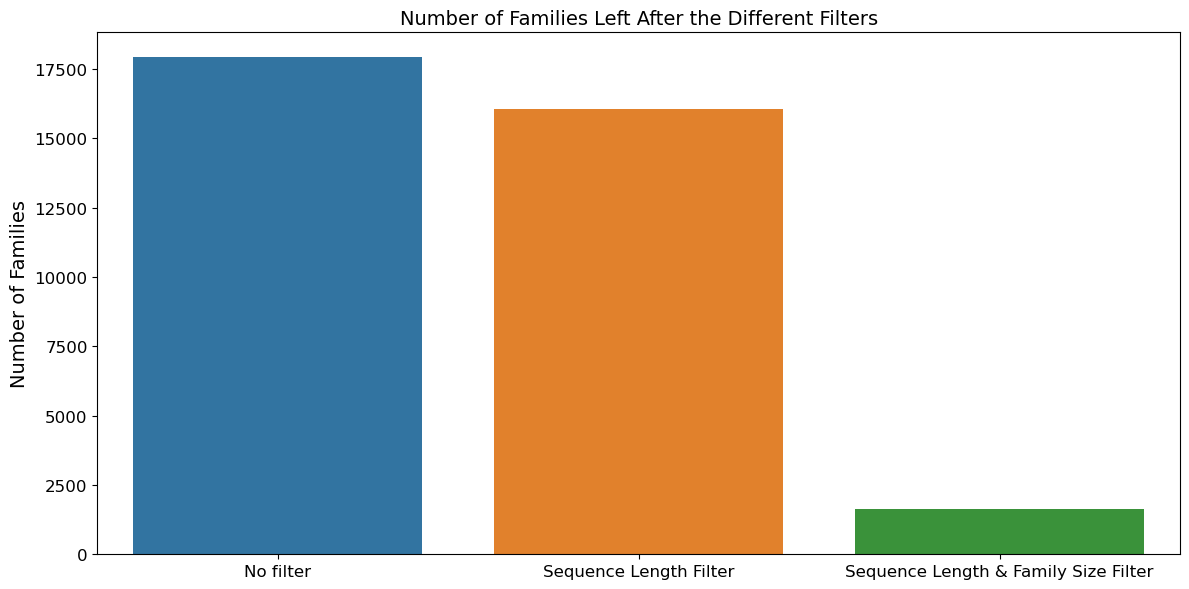

In [46]:
fig, ax = plt.subplots(figsize = (12,6))
sn.barplot(y=number_of_families, x=filtering)
plt.ylabel('Number of Families', fontdict={'fontsize':14})
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Number of Families Left After the Different Filters', fontdict={'fontsize':14})
plt.tight_layout()

Text(0.5, 0, 'Sequence Length')

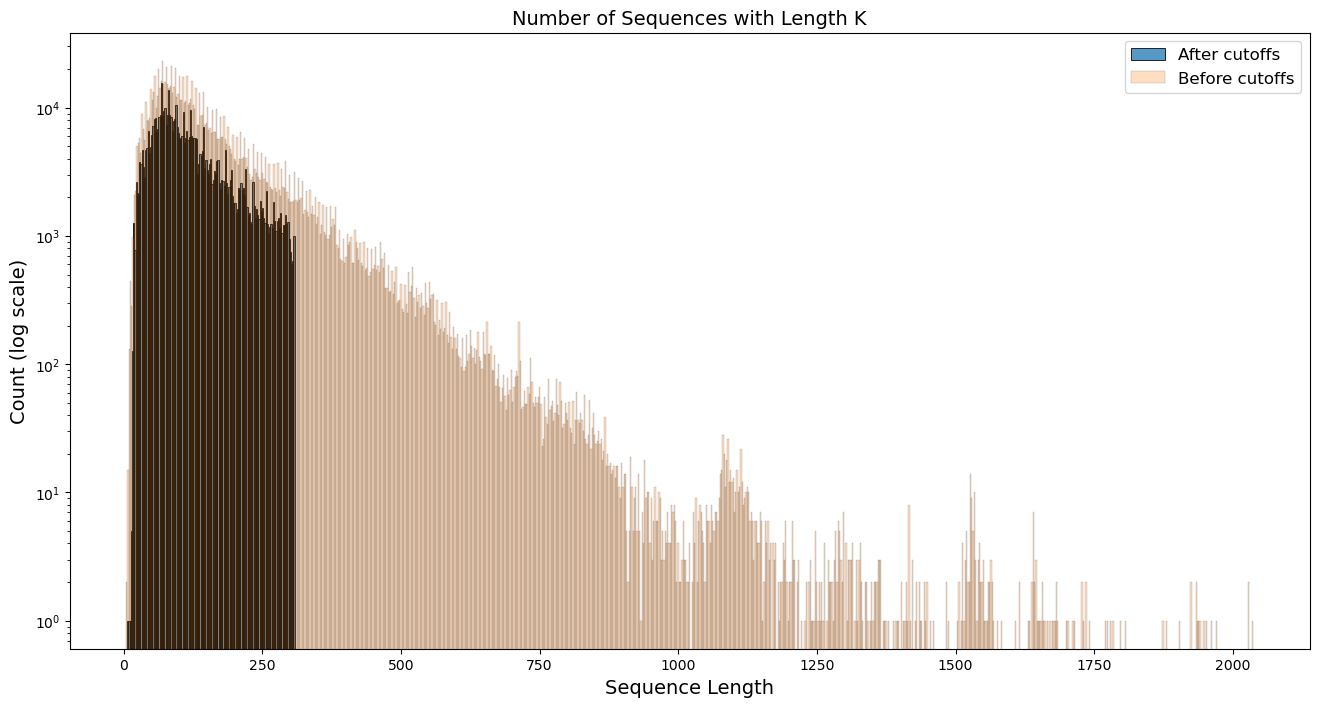

In [47]:
fig, ax = plt.subplots(figsize = (16,8))
sn.histplot(x=train_filtered_seq_lengths_and_sizes['seq_length'], stat='count', label='After cutoffs')
ax = sn.histplot(x=train_no_dups['seq_length'], stat='count', alpha=0.25, label='Before cutoffs')
ax.set_yscale('log')
plt.legend(fontsize=12)
plt.ylabel("Count (log scale)", fontdict={'fontsize':14})
plt.title('Number of Sequences with Length K', fontdict={'fontsize':14})
plt.xlabel('Sequence Length', fontdict={'fontsize':14})

In [48]:
datasets = pd.DataFrame(data={'dataset_length':[len(train_no_dups),len(train_filtered_seq_lengths_and_sizes),\
            len(val_no_dups),len(val_filtered_seq_lengths_and_sizes), \
            len(val_no_dups),len(val_filtered_seq_lengths_and_sizes)], 
                   'dataset_name':['Train','Train', 'Validation', 'Validation', 'Test', 'Test'],
                  "cutoff":['before', 'after', 'before', 'after', 'before', 'after']})

## After the cutoffs we have almost cut the dataset size in half

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 [Text(0, 0.0, '0.0'),
  Text(0, 200000.0, '0.2'),
  Text(0, 400000.0, '0.4'),
  Text(0, 600000.0, '0.6'),
  Text(0, 800000.0, '0.8'),
  Text(0, 1000000.0, '1.0'),
  Text(0, 1200000.0, '1.2')])

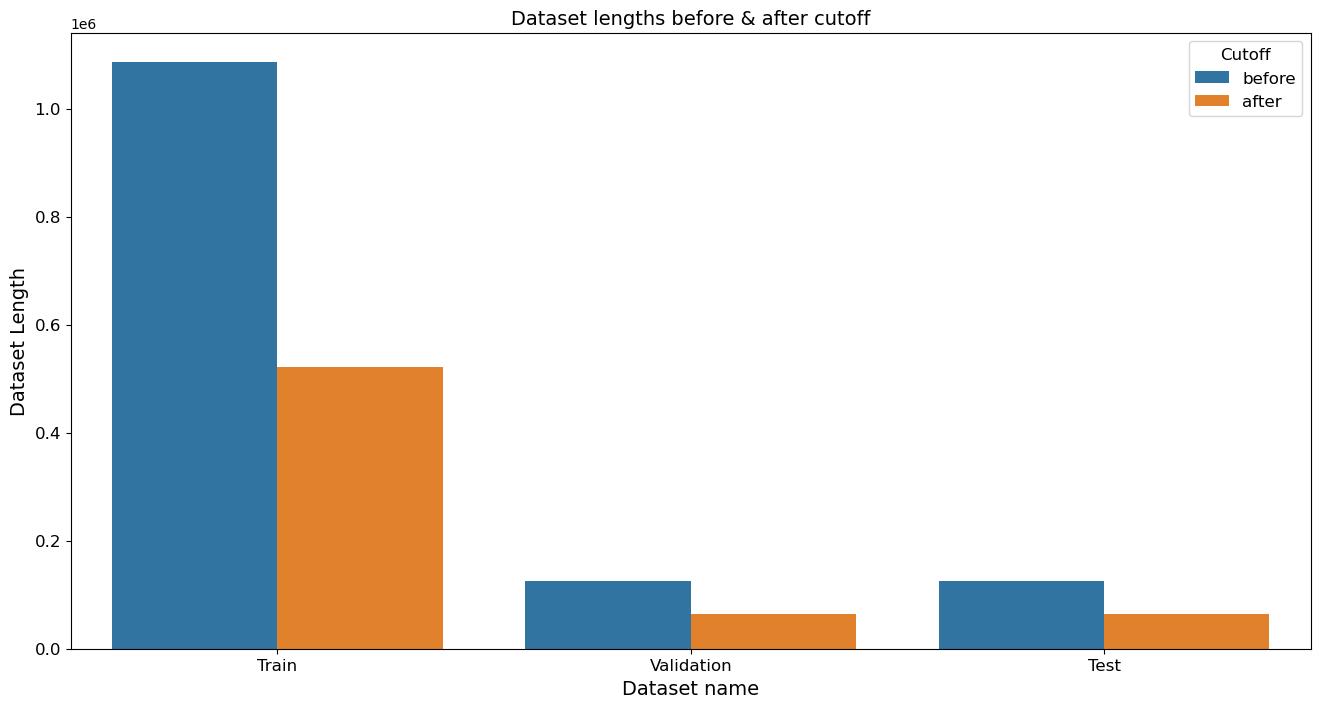

In [49]:
fig, ax = plt.subplots(figsize = (16,8))
sn.barplot(data=datasets, x='dataset_name', y='dataset_length', hue='cutoff')
plt.xlabel('Dataset name', fontdict={'fontsize':14})
plt.ylabel('Dataset Length', fontdict={'fontsize':14})
plt.title('Dataset lengths before & after cutoff', fontdict={'fontsize':14})
plt.legend(title='Cutoff',fontsize=12, title_fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)